# *CodexCue*
## **ALLOCATED PROJECTS 2 - Spam Email Classification**

### Mounted drive, dataset accessed.

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Codexcue/emails.csv.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## Required Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import random
import warnings
warnings.filterwarnings("ignore")

## Dataset Analysis

In [20]:
df = pd.read_csv('emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [21]:
rows, cols = df.shape
print("Our dataset have",rows,"rows and",cols,"columns")

Our dataset have 5172 rows and 3002 columns


In [8]:
if df.isnull().sum().sum() == 0:
    print("No missing values found in the dataset.")
else:
    print("Missing values found. Handling missing values...")
    df = df.dropna()

No missing values found in the dataset.


In [9]:
df.drop_duplicates(keep='first', inplace=True)

In [22]:
print(df['Prediction'].value_counts())

Prediction
0    3672
1    1500
Name: count, dtype: int64


In [23]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [24]:
categorical_columns

Index(['Email No.'], dtype='object')

##  Encoding categorical variables using LabelEncoder

In [30]:
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

##  Scaling numerical columns using StandardScaler except Prediction

In [25]:
numerical_columns = [col for col in df.columns if col != 'Prediction' and df[col].dtype in ['int64', 'float64']]

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [26]:
print("Encoded and scaled DataFrame:")
df.head(5)

Encoded and scaled DataFrame:


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,-0.565449,-0.649083,-0.293895,-0.508752,-0.667663,-0.421725,-0.611169,-0.571751,-0.290556,...,-0.047525,-0.062944,-0.091138,-0.172137,-0.044197,-0.04733,-0.056285,-0.329048,-0.070971,0
1,Email 2,0.115757,0.714508,1.337337,0.483741,0.614369,-0.100659,0.530831,-0.339949,3.584743,...,-0.047525,-0.062944,-0.091138,-0.172137,-0.044197,-0.04733,-0.056285,0.030672,-0.070971,0
2,Email 3,-0.565449,-0.649083,-0.293895,-0.508752,-0.667663,-0.421725,-0.542649,-0.571751,-0.290556,...,-0.047525,-0.062944,-0.091138,-0.172137,-0.044197,-0.04733,-0.056285,-0.329048,-0.070971,0
3,Email 4,-0.565449,-0.124625,1.195490,-0.508752,0.400697,-0.261192,-0.051589,-0.108147,1.144740,...,-0.047525,-0.062944,-0.091138,-0.172137,-0.044197,-0.04733,-0.056285,-0.329048,-0.070971,0
4,Email 5,0.030606,-0.019733,0.840875,-0.343336,0.400697,-0.100659,0.016931,-0.571751,1.001210,...,-0.047525,-0.062944,-0.091138,-0.172137,-0.044197,-0.04733,-0.056285,0.030672,-0.070971,0


## Splitting the dataset into training and testing sets

In [31]:
X = df.drop('Prediction', axis=1)  # Features
y = df['Prediction']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


## Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## Model Predictions

In [33]:
y_pred = model.predict(X_test)

## Model Evaluations

In [40]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.97
Precision: 0.90
Recall: 0.99
F1-score: 0.94


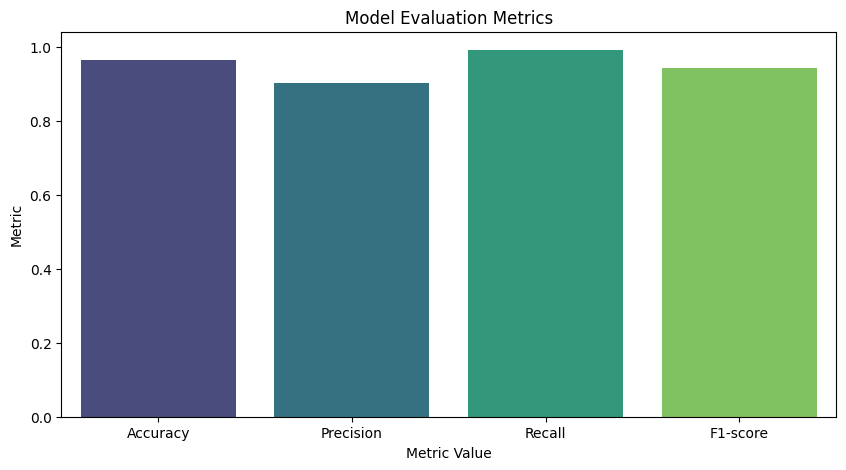

In [36]:
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metrics_values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
sns.barplot(x=metrics_names, y=metrics_values, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.xlabel('Metric Value')
plt.ylabel('Metric')
plt.show()


## Confusion Matrix

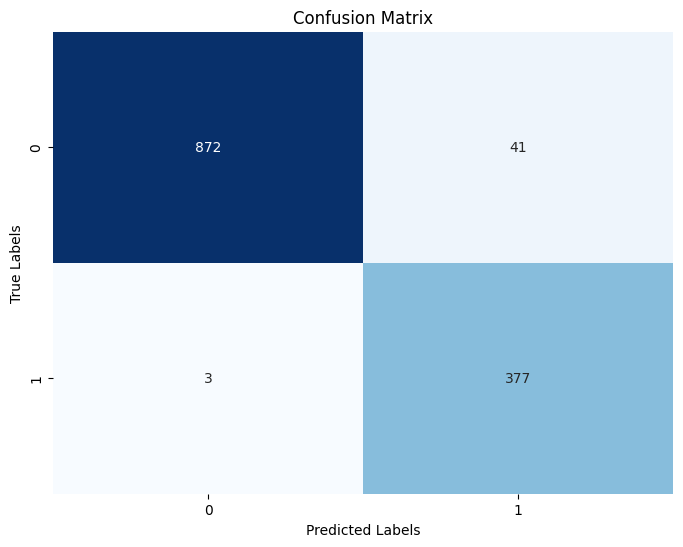

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Cross Validation for the Model

In [41]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the model
cv_scores = cross_val_score(model, X, y, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [0.94009662 0.9410628  0.9516441  0.95551257 0.91199226]
Mean cross-validation score: 0.9400616712920137


## Support Vector Machines SVM Model

In [43]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

## Model Predictions

In [45]:
y_pred = svm.predict(X_test)

## Model Evaluations

In [46]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.94
Precision: 0.87
Recall: 0.91
F1-score: 0.89


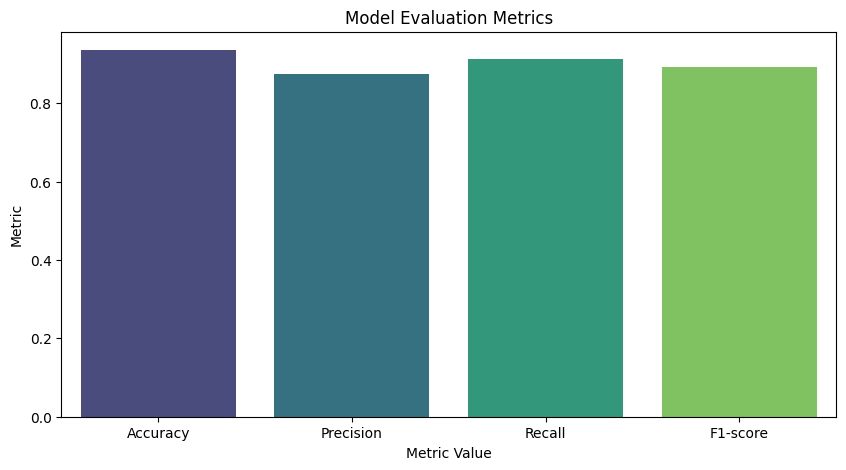

In [48]:
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metrics_values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
sns.barplot(x=metrics_names, y=metrics_values, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.xlabel('Metric Value')
plt.ylabel('Metric')
plt.show()


## Confusion Matrix

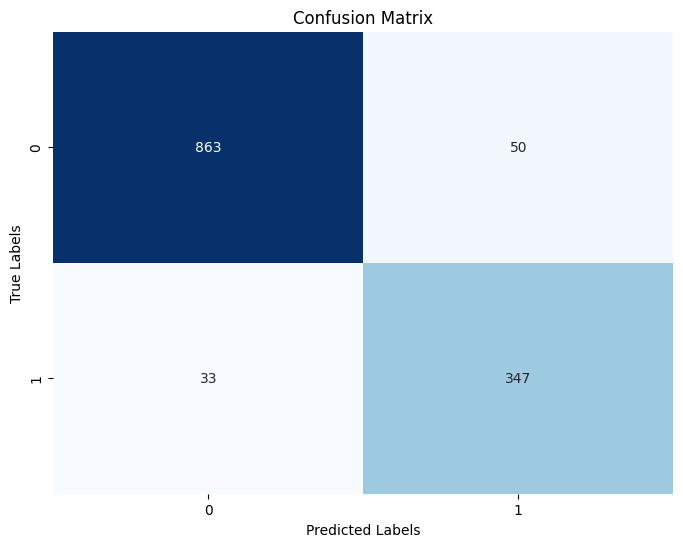

In [47]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Cross Validation for the Model

In [53]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the model
cv_scores = cross_val_score(svm, X, y, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [0.88695652 0.93043478 0.9410058  0.93713733 0.87427466]
Mean cross-validation score: 0.9139618198637625


## Decision Tree Model

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

## Model Predictions

In [50]:
y_pred = dt_model.predict(X_test)

## Model Evaluations

In [51]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.92
Precision: 0.86
Recall: 0.87
F1-score: 0.86


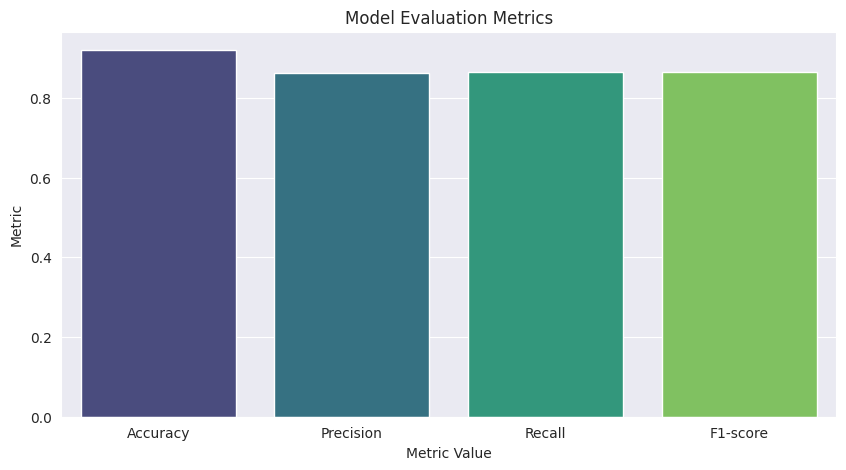

In [56]:
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metrics_values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
sns.barplot(x=metrics_names, y=metrics_values, palette='viridis')
plt.title('Model Evaluation Metrics')
plt.xlabel('Metric Value')
plt.ylabel('Metric')
plt.show()


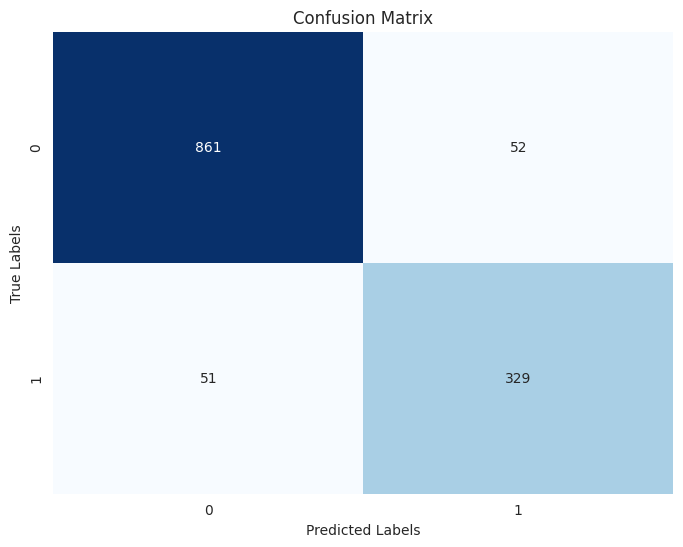

In [58]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
